# Name-CSV Adithya
## Microsoft Virtual Internship

## Project Submission- Analyzing using Facial Detection

### We are importing Azure Cognitive Service such as Face Service will use AI algorithms to process the data we supply and perform the calculations as we require.  

#### Install the client library

In [1]:
pip install --upgrade azure-cognitiveservices-vision-face

Requirement already up-to-date: azure-cognitiveservices-vision-face in c:\users\welcome\anaconda3\lib\site-packages (0.6.0)
Note: you may need to restart the kernel to use updated packages.


#### Create variables for your resource's Azure endpoint and key.

In [2]:
cog_key='f0e176242299429f87ce3f707f9d8547'
cog_endpoint='https://facialanalysis.cognitiveservices.azure.com/'
print('Can deploy azure using key {} at {}'.format(cog_key,cog_endpoint))

Can deploy azure using key f0e176242299429f87ce3f707f9d8547 at https://facialanalysis.cognitiveservices.azure.com/


#### Importing the required libraries

In [3]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials

#### Authenticate the client

In [4]:
# Create an authenticated FaceClient.
face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))
face_client

#### Working Directory

In [12]:
#Looking into current working directory and changing if required.
import os
os.getcwd()
os.chdir(r'C:\Users\welcome\Desktop\data')

In [11]:
cwd=os.getcwd()
cwd

'C:\\Users\\welcome\\Desktop\\data'

#### detect_with_stream--->Detect human faces in an image, return face rectangles, and optionally with faceIds, landmarks, and attributes.

In [13]:
%matplotlib inline
image_path=os.path.join(cwd,"CapFrame2.jpg")
image_stream=open(image_path,"rb")
detected_faces = face_client.face.detect_with_stream(image = image_stream)

#### Identify a face

In [14]:
def show_faces(image_path, detected_faces, show_id=False):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    # Open an image
    img = Image.open(image_path)

    # Create a figure to display the results
    fig = plt.figure(figsize=(8, 6))

    if detected_faces:
        # If there are faces, how many?
        num_faces = len(detected_faces)
        prediction = ' (' + str(num_faces) + ' faces detected)'
        # Draw a rectangle around each detected face
        for face in detected_faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta', width=5)
            if show_id:
                plt.annotate(face.face_id,(r.left, r.top + r.height + 15), backgroundcolor='white')
        #a = fig.add_subplot(1,1,1)
        fig.suptitle(prediction)

    plt.axis('off')
    plt.imshow(img)

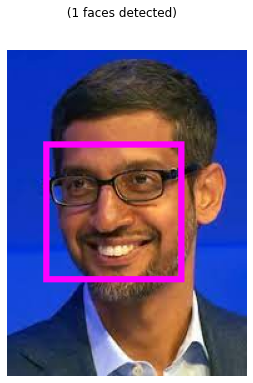

In [15]:
show_faces(image_path, detected_faces)

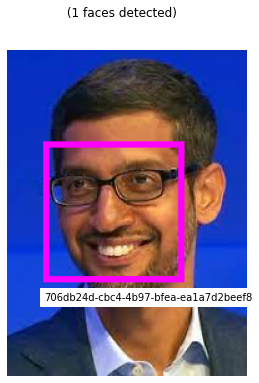

In [16]:
#Face recognized with a unique id
show_faces(image_path, detected_faces, show_id = True)

In [20]:
image_path = os.path.join('CapFrame2.jpg')
image_stream = open(image_path, "rb")

# Detect faces and specified facial attributes
attributes = ['age', 'emotion']
detected_faces = face_client.face.detect_with_stream(image=image_stream, return_face_attributes=attributes)

#### Analyze Facial attributes

In [21]:
def show_face_attributes(image_path, detected_faces):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    # Open an image
    img = Image.open(image_path)

    # Create a figure to display the results
    fig = plt.figure(figsize=(8, 6))

    if detected_faces:
        # If there are faces, how many?
        num_faces = len(detected_faces)
        prediction = ' (' + str(num_faces) + ' faces detected)'
        # Draw a rectangle around each detected face
        for face in detected_faces:
            r = face.face_rectangle
            bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
            draw = ImageDraw.Draw(img)
            draw.rectangle(bounding_box, outline='magenta', width=5)

            # Annotate with face attributes (only age and emotion are used in this sample)
            detected_attributes = face.face_attributes.as_dict()
            age = 'age unknown' if 'age' not in detected_attributes.keys() else int(detected_attributes['age'])
            annotations = 'Person aged approximately {}'.format(age)
            txt_lines = 1
            if 'emotion' in detected_attributes.keys():
                for emotion_name in detected_attributes['emotion']:
                    txt_lines += 1
                    annotations += '\n - {}: {}'.format(emotion_name, detected_attributes['emotion'][emotion_name])
            print(plt.annotate(annotations,((r.left + r.width), (r.top + r.height + (txt_lines * 12))), backgroundcolor='white'))

        # Plot the image
        #a = fig.add_subplot(1,1,1)
        fig.suptitle(prediction)

    plt.axis('off')
    plt.imshow(img)
    

Annotation(141, 294, 'Person aged approximately 38\n - anger: 0.0\n - contempt: 0.0\n - disgust: 0.0\n - fear: 0.0\n - happiness: 1.0\n - neutral: 0.0\n - sadness: 0.0\n - surprise: 0.0')


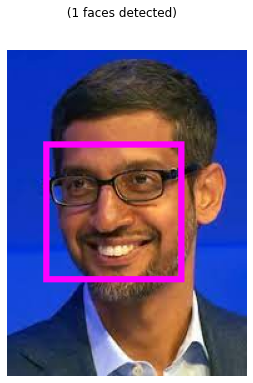

In [22]:
show_face_attributes(image_path, detected_faces)

### Facial Recognition

In [24]:
import os
%matplotlib inline
# Get the ID of the first face in image 1
os.getcwd()
os.chdir(r'C:\Users\welcome\Desktop\data')
cwd=os.getcwd()

image_1_path = os.path.join(cwd,'CapFrame2.jpg')
image_1_stream = open(image_1_path, "rb")
image_1_faces = face_client.face.detect_with_stream(image = image_1_stream)
face_1 = image_1_faces[0]

# Get the face IDs in a second image
os.getcwd()
os.chdir(r'C:\Users\welcome\Desktop\data')
cwd=os.getcwd()

image_2_path = os.path.join(cwd,'CapFrame4.jpg')
image_2_stream = open(image_2_path, "rb")
image_2_faces = face_client.face.detect_with_stream(image = image_2_stream)
image_2_face_ids = list(map(lambda face: face.face_id, image_2_faces))

similar_faces = face_client.face.find_similar(face_id = face_1.face_id, face_ids = image_2_face_ids)

In [25]:
def show_similar_faces(image_1_path, image_1_face, image_2_path, image_2_faces, similar_faces):
    import matplotlib.pyplot as plt
    from PIL import Image, ImageDraw

    # Create a figure to display the results
    fig = plt.figure(figsize=(16, 6))

    # Show face 1
    img1 = Image.open(image_1_path)
    r = image_1_face.face_rectangle
    bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
    draw = ImageDraw.Draw(img1)
    draw.rectangle(bounding_box, outline='magenta', width=5)
    a = fig.add_subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img1)
    
   # get the matching face IDs
    matching_face_ids = list(map(lambda face: face.face_id, similar_faces))

    # Draw a rectangle around each similar face in image 2
    img2 = Image.open(image_2_path)
    a = fig.add_subplot(1,2,2)
    plt.axis('off')
    for face in image_2_faces:
        r = face.face_rectangle
        bounding_box = ((r.left, r.top), (r.left + r.width, r.top + r.height))
        draw = ImageDraw.Draw(img2)
        if face.face_id in matching_face_ids:
            draw.rectangle(bounding_box, outline='lightgreen', width=10)
            plt.annotate('Match!',(r.left, r.top + r.height + 15), backgroundcolor='white')
        else:
            draw.rectangle(bounding_box, outline='red', width=5)
    plt.imshow(img2)
    plt.show()

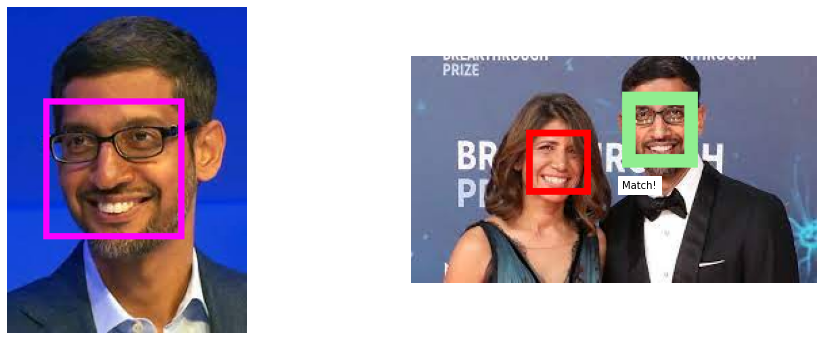

In [26]:
show_similar_faces(image_1_path, face_1, image_2_path, image_2_faces, similar_faces)